# Task 1 - Data Analysis and Preprocessing

In [4]:
# %pip install imbalanced-learn

In [48]:
import pandas as pd
import numpy as np
import os
import sys
import ipaddress
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sys.path.append(os.path.abspath("../Script"))
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir("..")
# print(os.getcwd()) 

In [4]:
from data_load import *

Loading Data sets

1. Handle Missing Values :
Impute or drop missing values

In [21]:
    # Load datasets
fraud_df = load_and_clean_data("Data/Fraud_Data.csv")
ip_df = load_and_clean_data("Data/IpAddress_to_Country.csv")
credit_df = load_and_clean_data("Data/creditcard.csv")

Loaded: Data/Fraud_Data.csv | Rows: 151112, Columns: 11
Cleaned: Removed duplicates and empty rows.
Loaded: Data/IpAddress_to_Country.csv | Rows: 138846, Columns: 3
Cleaned: Removed duplicates and empty rows.
Loaded: Data/creditcard.csv | Rows: 284807, Columns: 31
Cleaned: Removed duplicates and empty rows.


In [6]:
    # Handle missing
fraud_df = handle_missing_values(fraud_df)
ip_df = handle_missing_values(ip_df)
credit_df = handle_missing_values(credit_df)

Missing values before handling:
 Series([], dtype: int64)
Missing values handled.
Missing values before handling:
 Series([], dtype: int64)
Missing values handled.
Missing values before handling:
 Series([], dtype: int64)
Missing values handled.


2. Data Cleaning :Remove duplicates and Correct data types

In [7]:
# Data type of two datasets
pd.concat([fraud_df.dtypes.rename('fraud_df'), ip_df.dtypes.rename('ip_df')], axis=1)

,fraud_df,ip_df
user_id,Int64,NaN
signup_time,string[python],NaN
purchase_time,string[python],NaN
purchase_value,Int64,NaN
device_id,string[python],NaN
source,string[python],NaN
browser,string[python],NaN
sex,string[python],NaN
age,Int64,NaN
ip_address,Float64,NaN


In [8]:
fraud_df.dtypes

user_id                    Int64
signup_time       string[python]
purchase_time     string[python]
purchase_value             Int64
device_id         string[python]
source            string[python]
browser           string[python]
sex               string[python]
age                        Int64
ip_address               Float64
class                      Int64
dtype: object

In [9]:
# merged_df = fraud_df.merge(ip_df, how='left', on='upper_bound_ip_address')
print("fraud_df columns:", fraud_df.columns)
print("ip_df columns:", ip_df.columns)

fraud_df columns: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')
ip_df columns: Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')


3. Exploratory Data Analysis (EDA) :Univariate analysis


for Fraud Dataset

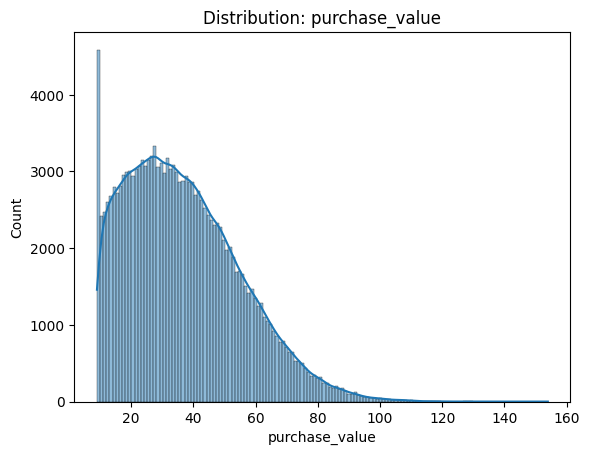

In [10]:
  # EDA for Univariate analysis
eda_univariate(fraud_df, ['purchase_value'])

For IP Address to Country dataset

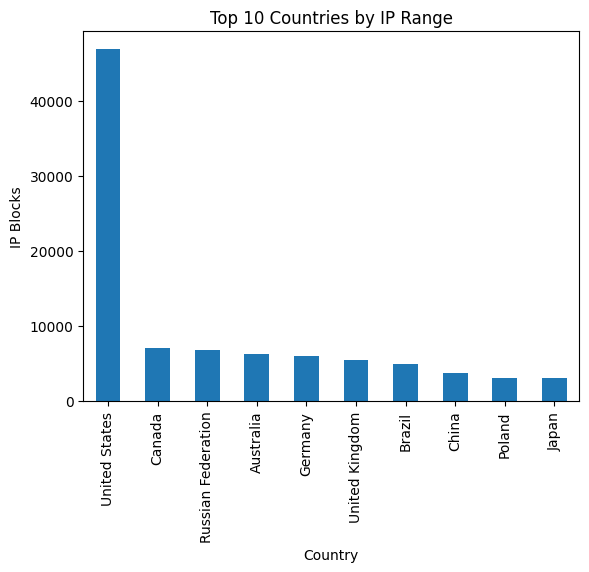

In [12]:
# Frequency of top 10 countries
ip_df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by IP Range')
plt.xlabel('Country')
plt.ylabel('IP Blocks')
plt.show()

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'purchase_value'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'ip_address'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

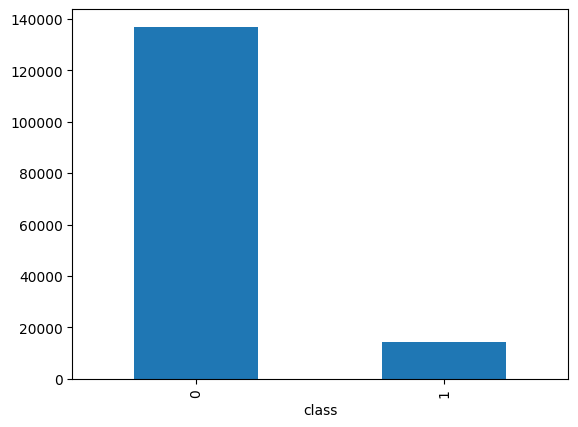

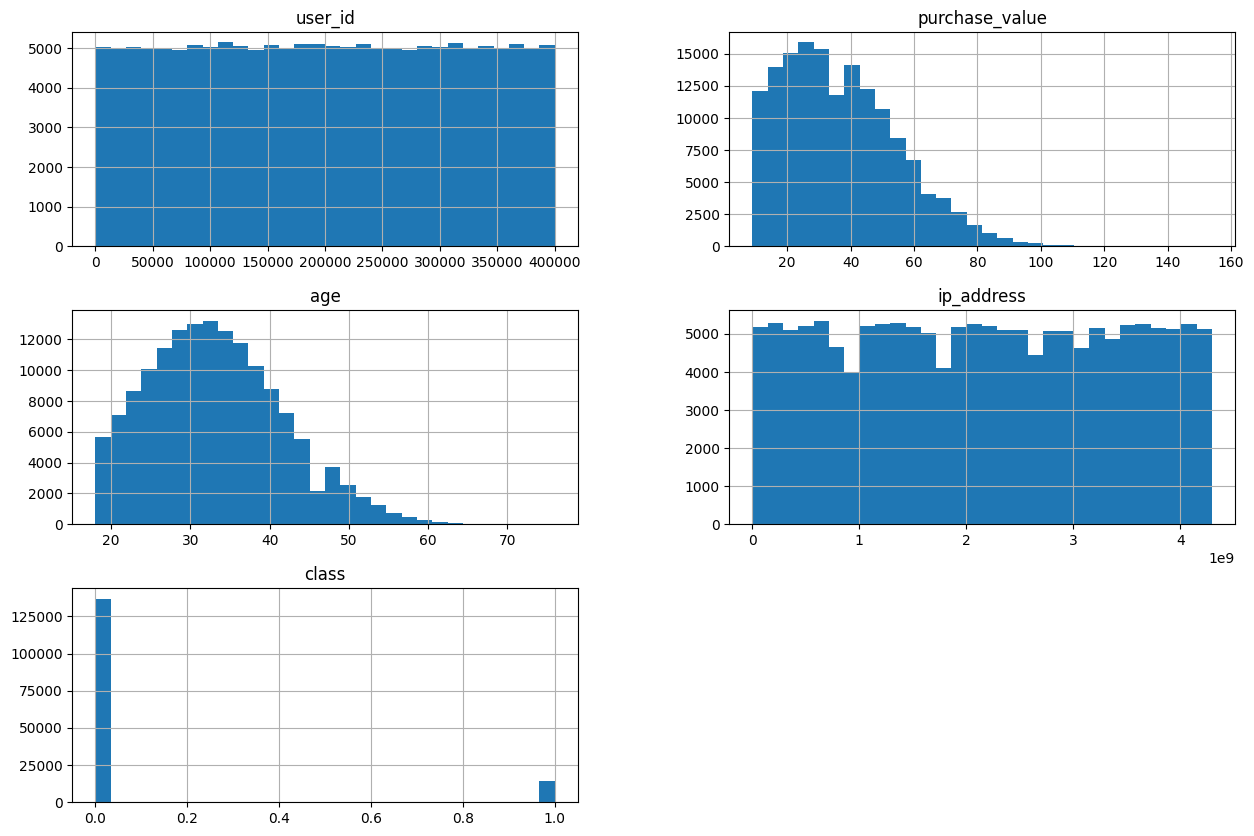

In [11]:
fraud_df['class'].value_counts().plot(kind='bar')
fraud_df.hist(bins=30, figsize=(15,10))

Bivariate analysis

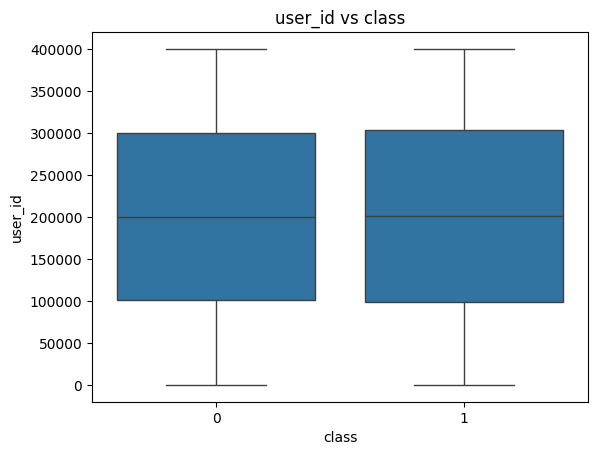

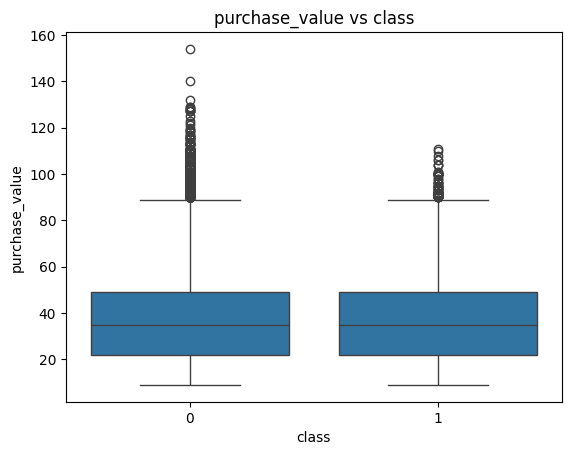

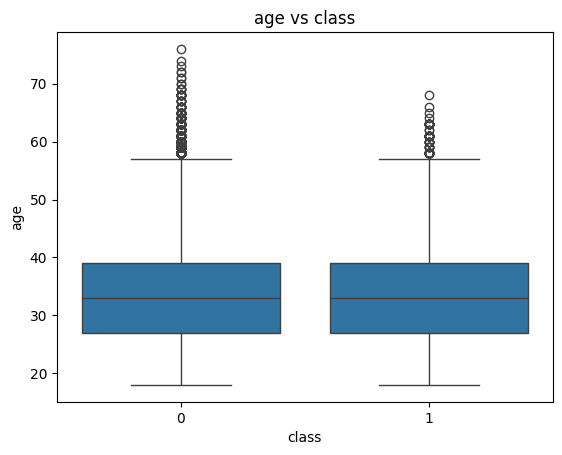

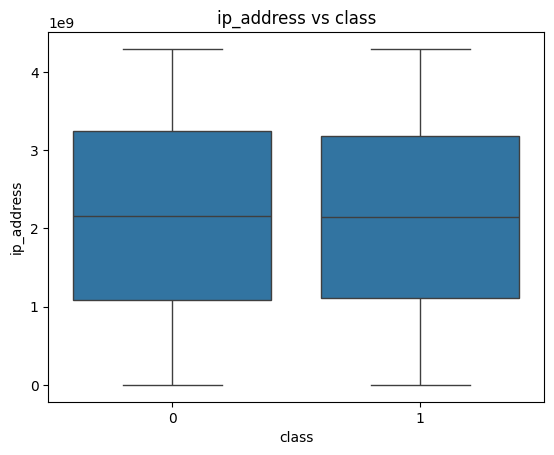

In [14]:
  # EDA for Bivariate analysis
eda_bivariate(fraud_df, 'class')  # assumes 'class' column for fraud label

<Axes: xlabel='class', ylabel='purchase_value'>

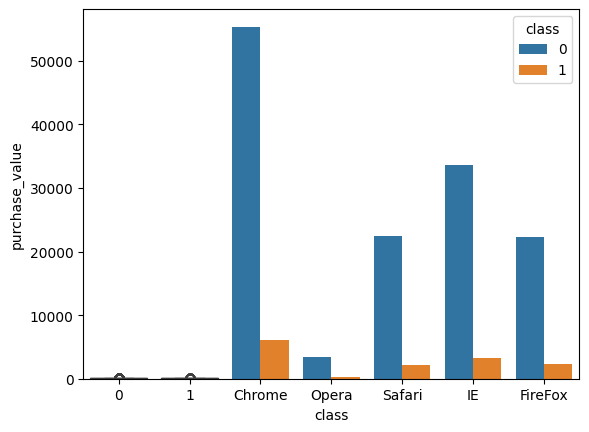

In [16]:
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
sns.countplot(x='browser', hue='class', data=fraud_df)

4. Merge Datasets for Geolocation Analysis:
Convert IP addresses to integer format


In [17]:
  # Merge IP info
fraud_df = merge_ip_geolocation(fraud_df, ip_df)

IP address merged with geolocation successfully.


Merge Fraud_Data.csv with IpAddress_to_Country.csv

In [23]:
min_len = min(len(fraud_df), len(ip_df))

fraud_df_trunc = fraud_df.iloc[:min_len].reset_index(drop=True)
ip_df_trunc = ip_df.iloc[:min_len].reset_index(drop=True)

combined_df = pd.concat([fraud_df_trunc, ip_df_trunc], axis=1)
combined_df
# fraud_df['ip_int'] = fraud_df['ip_address'].astype(int)
# fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,lower_bound_ip_address,upper_bound_ip_address,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,732758368,16777216,16777471,Australia
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,350311387,16777472,16777727,China
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,2621473820,16777728,16778239,China
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,3840542443,16778240,16779263,Australia
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,415583117,16779264,16781311,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138841,247696,2015-02-17 21:13:03,2015-03-24 01:51:20,44,EQCFZJCMSVWRP,SEO,Safari,F,27,758375292.292255,0,758375292,3758092288,3758093311,Hong Kong
138842,299384,2015-01-10 21:17:17,2015-01-10 21:17:18,35,VMZFQRAKOVOFX,Direct,FireFox,M,36,3877823434.63715,1,3877823434,3758093312,3758094335,India
138843,90291,2015-03-27 05:09:03,2015-06-17 12:14:14,18,AACRSKFMHVMCE,SEO,Chrome,M,48,2236453895.75165,0,2236453895,3758095360,3758095871,China
138844,28946,2015-01-31 05:15:18,2015-02-12 12:40:27,52,JCBWXXFCMDFQQ,Ads,IE,F,26,3559905107.13878,0,3559905107,3758095872,3758096127,Singapore


5. Feature Engineering :Transaction frequency and velocity for Fraud_Data.csv

In [24]:
 # Feature engineering
fraud_df = feature_engineering_fraud(fraud_df)

 Feature engineering completed.


Time-Based features for Fraud_Data.csv

hour_of _day,Day_of_week
time_since_signup: Calculate the duration between signup_time and purchase_t

In [25]:

# Ensure datetime
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])

# Transaction frequency (count per user)
fraud_df['transaction_count'] = fraud_df.groupby('user_id')['purchase_time'].transform('count')

# Days since signup at each purchase
fraud_df['days_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / (60*60*24)

# Transaction velocity (transactions per day)
epsilon = 1e-5
fraud_df['transaction_velocity'] = fraud_df['transaction_count'] / (fraud_df['days_since_signup'] + epsilon)

# Extract hour of day and day of week
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

# Time since signup in seconds & minutes
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()
fraud_df['time_since_signup_minutes'] = fraud_df['time_since_signup'] / 60
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,hour_of_day,day_of_week,time_since_signup,transaction_count,avg_time_between,days_since_signup,transaction_velocity,time_since_signup_minutes
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,732758368,2,5,4506682.0,1,NaN,52.160671,0.019172,75111.366667
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,350311387,1,0,17944.0,1,NaN,0.207685,4.814748,299.066667
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,2621473820,18,3,1.0,1,NaN,0.000012,46351.931330,0.016667
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,3840542443,13,0,492085.0,1,NaN,5.695428,0.175579,8201.416667
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,415583117,18,2,4361461.0,1,NaN,50.479873,0.019810,72691.016667


6. Data Transformation:
Handle Class Imbalance: Analyze the class distribution. Research and apply appropriate sampling techniques (e.g., SMOTE for oversampling, Random Undersampling) to the training data only. Justify your choice

Original class distribution:
Counter({np.int64(0): 136961, np.int64(1): 14151})


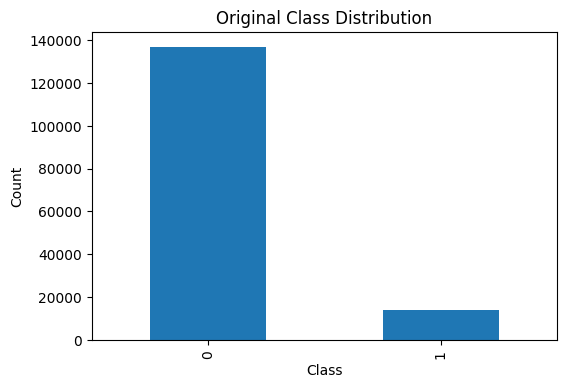


Training class distribution before sampling:
Counter({np.int64(0): 109568, np.int64(1): 11321})

Imbalance ratio (majority/minority): 9.68

Applying SMOTE for oversampling minority class...

Training class distribution after sampling:


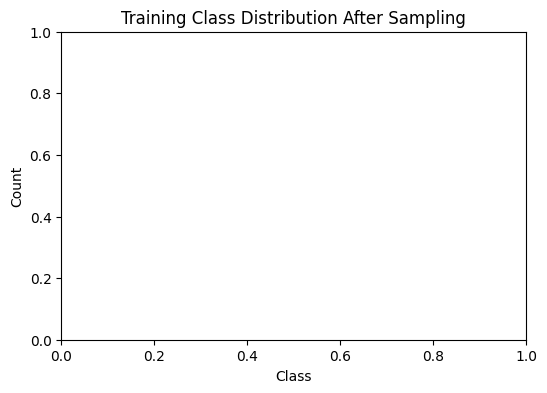

In [61]:
# Example: Suppose our data is in fraud_df with target column 'class'
X = fraud_df.drop(columns='class')
y = fraud_df['class']

# 1. Check original class distribution
print("Original class distribution:")
print(Counter(y))

# Visualize class distribution
plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar')
plt.title("Original Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 2. Split the dataset into train and test (important: stratify to keep class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining class distribution before sampling:")
print(Counter(y_train))

# 3. Choose a sampling strategy based on imbalance ratio
imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"\nImbalance ratio (majority/minority): {imbalance_ratio:.2f}")

if imbalance_ratio > 3:
    # If imbalance is severe, apply SMOTE (oversampling minority)
    print("\nApplying SMOTE for oversampling minority class...")
    sampler = SMOTE(random_state=42)
else:
    # If imbalance is mild, Random Undersampling is an option
    print("\nApplying Random Undersampling of majority class...")
    sampler = RandomUnderSampler(random_state=42)

# 4. Apply sampling only to training data
# X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

print("\nTraining class distribution after sampling:")
# print(Counter(y_train_resampled))

# 5. (Optional) Visualize new training class distribution
plt.figure(figsize=(6,4))
# pd.Series(y_train_resampled).value_counts().plot(kind='bar')
plt.title("Training Class Distribution After Sampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Normalization and Scaling (e.g., StandardScaler, MinMaxScaler),Encode Categorical Features (e.g., One-Hot Encoding).

In [64]:
# Drop ID or datetime columns that are not useful for modeling
X = X.drop(columns=['user_id', 'device_id', 'TransactionStartTime'], errors='ignore')
scaler_std = StandardScaler()
# X_train_scaled = scaler_std.fit_transform(X_train)
# X_test_scaled = scaler_std.transform(X_test)

In [65]:
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)